# Comparison MDA vs KMeans

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from bluemath_tk.datamining.mda import MDA
from bluemath_tk.datamining.kma import KMA
from bluemath_tk.datamining.lhs import LHS

from utils.plotting import plot_variable_combinations

## Load Dataset

In [3]:
data = (
    xr.open_dataset("/workspaces/BlueMath/climate_services/probabilistic/MUSCLE_Aveiro/data/era5_aveiro.nc")
    .rename({"swh": "Hs", "pp1d": "Tp", "mwd": "Dir"})
    .to_dataframe()
    .iloc[::10, :]
    .reset_index()
    .drop(columns=["latitude", "longitude", "time"])
)
data

,Hs,Tp,Dir
0,4.233710,7.783655,170.643792
1,3.931029,13.985347,214.811325
2,4.210661,13.922741,233.840720
3,4.045769,14.130647,243.036796
4,3.583768,13.645868,250.315649
...,...,...,...
73630,2.037433,11.260138,297.323308
73631,1.970565,11.130574,296.636624
73632,2.304654,11.563795,287.248277
73633,4.109092,13.685708,308.639865


In [4]:
num_centers = 100
dir_vars = ['Dir']

mda = MDA(num_centers=num_centers)
nearest_centroids_idxs, nearest_centroids_df = mda.fit_predict(
    data=data,
    directional_variables=dir_vars,
)

/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap="rainbow", alpha=0.2)


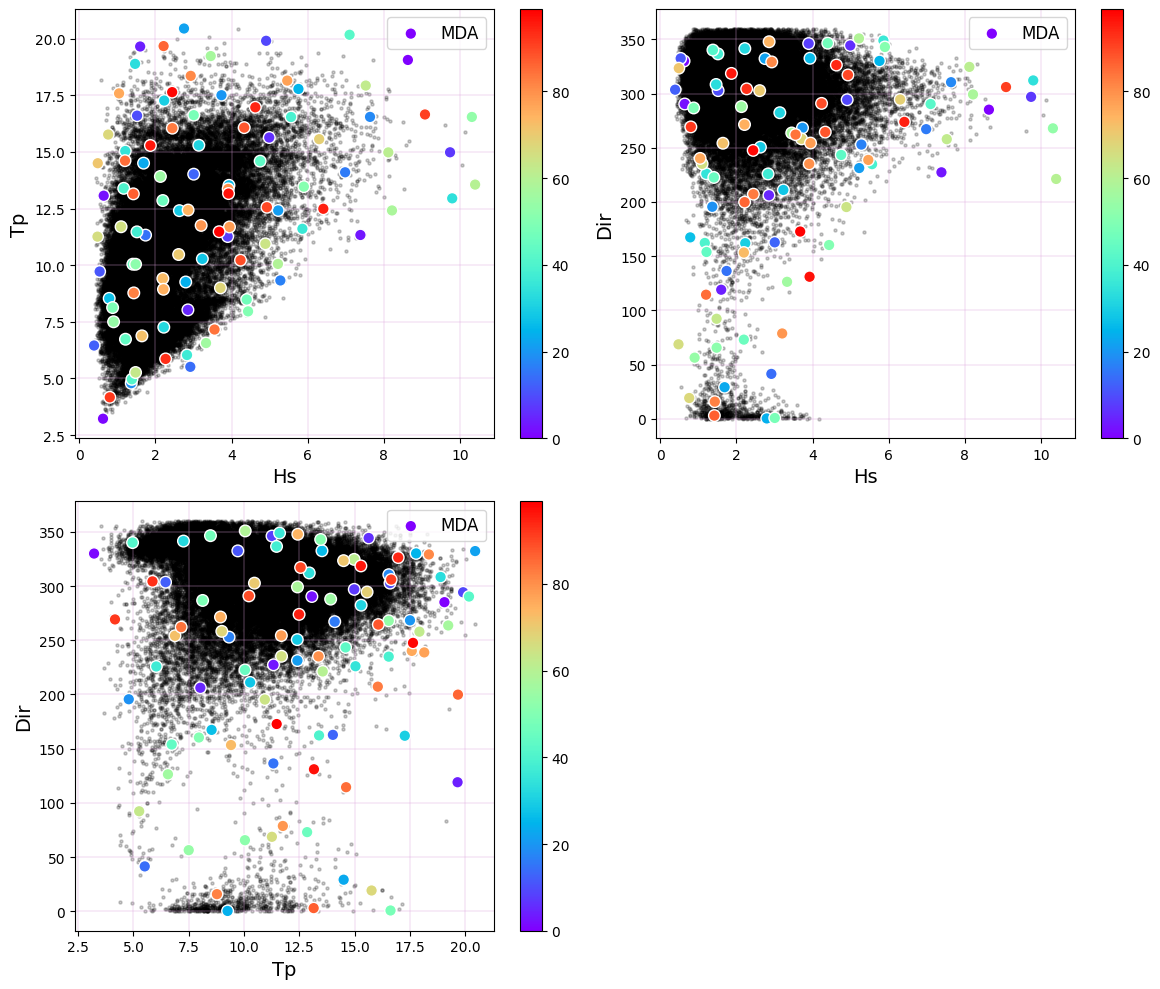

In [5]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
sel_mda = mda.centroids[vars]  # Selección de puntos
plot_variable_combinations(mda.data, vars, mda.centroids, labels = 'MDA')

## KMA

In [6]:
num_centers = 100
dir_vars = ['Dir']

kma = KMA(num_clusters=num_centers)
nearest_centroids_idxs, nearest_centroids_df = kma.fit_predict(
    data=data,
    directional_variables=dir_vars,
)

/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap="rainbow", alpha=0.2)


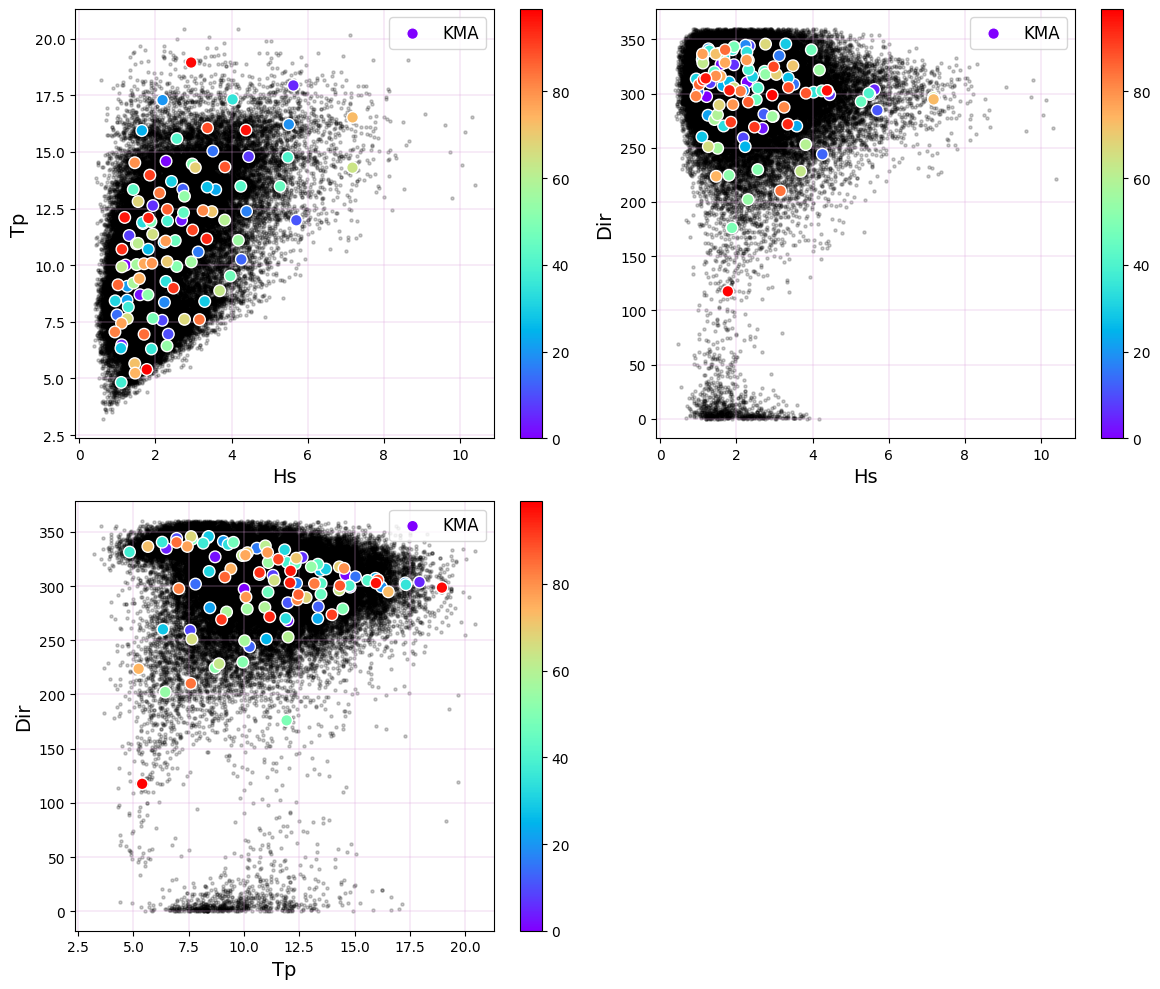

In [7]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
plot_variable_combinations(kma.data, vars, kma.centroids, labels = 'KMA')

## Compare MDA vs KMA

/workspaces/BlueMath/toolkit/datamining/utils/plotting.py:59: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(v1, v2, c=data_color, s=size_point, cmap="rainbow", alpha=0.2)


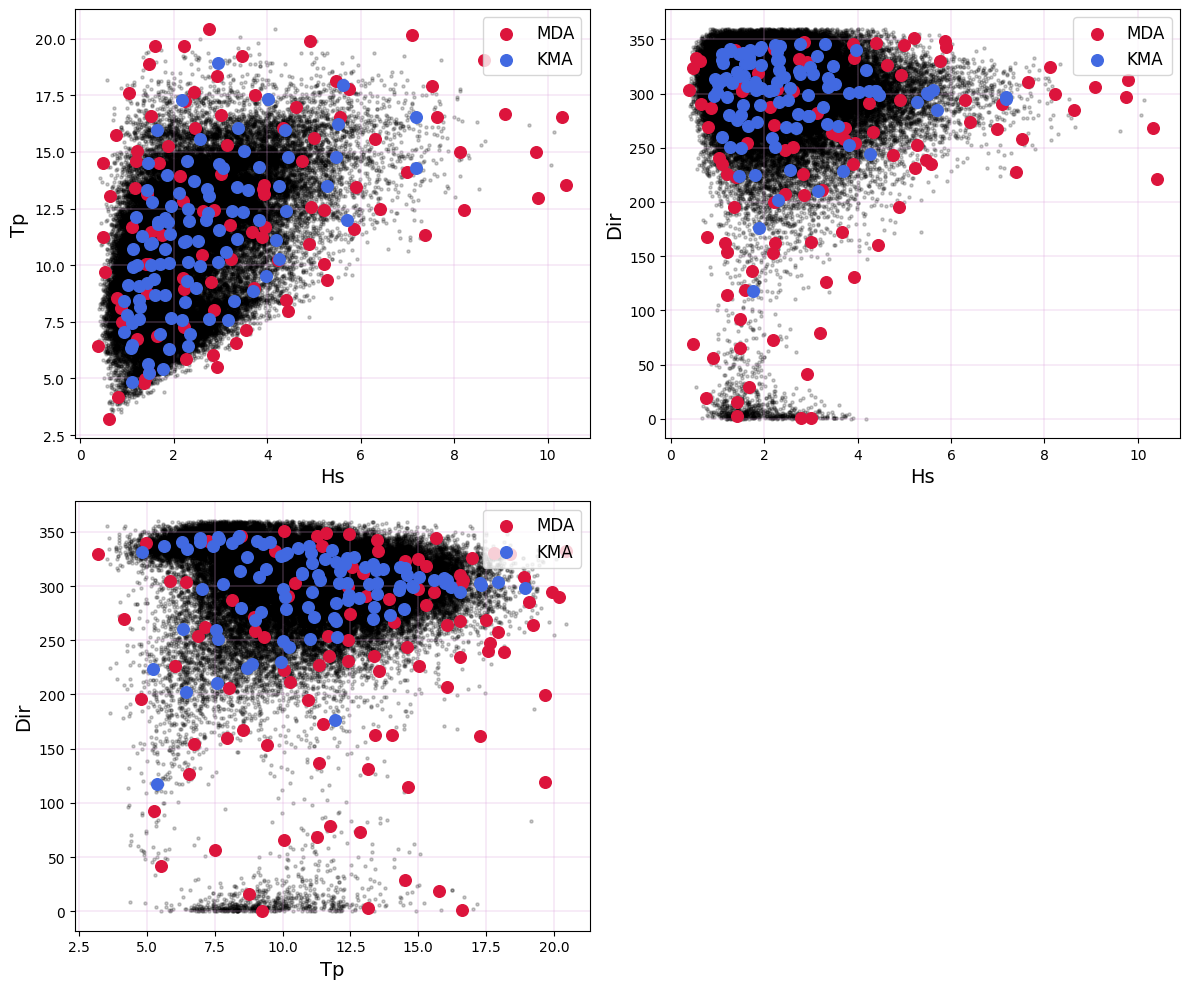

In [8]:
vars = ['Hs', 'Tp', 'Dir']  # Lista de variables
sel_mda = mda.centroids[vars]  # Selección de puntos
plot_variable_combinations(mda.data, vars, [mda.centroids, kma.centroids], labels = ['MDA', 'KMA'])

### Predict the cluster for a given value using MDA and KMeans

In [9]:
# Generate a sample data to predict:

data_pred = pd.DataFrame(
    {
        'Hs': [4, 2, 6],
        'Tp': [12, 10, 15],
        'Dir': [90, 350, 280]
    }
)

### Using MDA

In [10]:
print('\nInput data to predict:')
print(data_pred)

print('\nPredicted Cluster:')
print(mda.centroids.iloc[mda.predict(data_pred)[0]])


Input data to predict:
   Hs  Tp  Dir
0   4  12   90
1   2  10  350
2   6  15  280

Predicted Cluster:
          Hs         Tp     Dir_u     Dir_v         Dir
79  3.201554  11.755965  0.980462  0.196707   78.655566
24  2.796543   9.257411  0.004506  0.999990    0.258195
69  6.303089  15.563558 -0.910242  0.414077  294.461208


### Using KMeans

In [11]:
print('\nInput data to predict:')
print(data_pred)

print('\nPredicted Cluster:')
print(kma.centroids.iloc[kma.predict(data_pred)[0].kma_bmus.values])


Input data to predict:
   Hs  Tp  Dir
0   4  12   90
1   2  10  350
2   6  15  280

Predicted Cluster:
          Hs         Tp     Dir_u     Dir_v         Dir
71  3.484662  12.363707 -0.550512  0.805568  325.651939
76  1.700581  10.063100 -0.508870  0.828626  328.445352
40  5.479743  14.766475 -0.813437  0.473839  300.221427
